<a href="https://colab.research.google.com/github/aliEsmaelFard/aliEsmaelFard-Stock-price-prediction-using-the-RNN-Ml-Model/blob/main/RnnGoogleStockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [526]:
dataset_train = pd.read_csv("/content/AAPL-Train.csv")

In [527]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/10/2009,5.916429,5.950000,5.845000,5.882857,4.993350,300294400
1,8/11/2009,5.846071,5.870714,5.781429,5.815357,4.936055,355342400
2,8/12/2009,5.805357,5.953929,5.802143,5.903929,5.011234,445071200
3,8/13/2009,5.951786,6.023929,5.946429,6.015000,5.105511,439980800
4,8/14/2009,5.997857,6.008214,5.911786,5.956429,5.055795,305816000
...,...,...,...,...,...,...,...
1793,9/22/2016,28.587500,28.735001,28.500000,28.655001,26.566467,124296000
1794,9/23/2016,28.605000,28.697500,27.887501,28.177500,26.123774,209924800
1795,9/26/2016,27.910000,28.347500,27.887501,28.219999,26.163172,119477600
1796,9/27/2016,28.250000,28.295000,28.084999,28.272499,26.211843,98429600


In [528]:
trainset = dataset_train.iloc[:,1:2].values

In [529]:
trainset

array([[ 5.916429],
       [ 5.846071],
       [ 5.805357],
       ...,
       [27.91    ],
       [28.25    ],
       [28.422501]])

In [530]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(trainset)

In [531]:
training_scaled

array([[0.0051694 ],
       [0.0026424 ],
       [0.0011801 ],
       ...,
       [0.79509737],
       [0.80730891],
       [0.81350451]])

In [532]:
len(training_scaled)

1798

In [533]:
x_train = []
y_train = []

In [534]:
for i in range(5, 1798):
  x_train.append(training_scaled[i-5:i, 0])
  y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [535]:
x_train.shape

(1793, 5)

In [536]:
y_train.shape

(1793,)

In [537]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [538]:
x_train.shape

(1793, 5, 1)

In [539]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [540]:
 regressor = Sequential()
 regressor.add(LSTM(units = 50 , return_sequences=True, input_shape = (x_train.shape[1],1)))

In [541]:
regressor.add(Dropout(0.2))

In [542]:
regressor.add(LSTM(units = 100 , return_sequences=True))
regressor.add(Dropout(0.2))

In [543]:
regressor.add(LSTM(units = 100 , return_sequences=True))
regressor.add(Dropout(0.2))

In [544]:
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

In [545]:
regressor.add(Dense(units=1))

In [546]:
regressor.compile(optimizer='adam', loss = 'MSE', metrics=['accuracy'] )

In [547]:
regressor.fit(x_train, y_train, epochs=50, batch_size= 64)

Epoch 1/50
29/29 [==============================] - 10s 33ms/step - loss: 0.1042 - accuracy: 0.0011
Epoch 2/50
29/29 [==============================] - 1s 31ms/step - loss: 0.0136 - accuracy: 0.0011
Epoch 3/50
29/29 [==============================] - 1s 35ms/step - loss: 0.0048 - accuracy: 0.0011
Epoch 4/50
29/29 [==============================] - 1s 34ms/step - loss: 0.0041 - accuracy: 0.0011
Epoch 5/50
29/29 [==============================] - 1s 34ms/step - loss: 0.0037 - accuracy: 0.0011
Epoch 6/50
29/29 [==============================] - 1s 33ms/step - loss: 0.0032 - accuracy: 0.0011
Epoch 7/50
29/29 [==============================] - 1s 41ms/step - loss: 0.0035 - accuracy: 0.0011
Epoch 8/50
29/29 [==============================] - 2s 58ms/step - loss: 0.0031 - accuracy: 0.0011
Epoch 9/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0031 - accuracy: 0.0011
Epoch 10/50
29/29 [==============================] - 1s 47ms/step - loss: 0.0026 - accuracy: 0.0011
Epoch 11

In [548]:
dataset_test = pd.read_csv("/content/AAPL-Test-fix.csv")

In [549]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [550]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total

0        5.916429
1        5.846071
2        5.805357
3        5.951786
4        5.997857
          ...    
955    109.377502
956    110.404999
957    113.205002
958    112.599998
959    111.970001
Name: Open, Length: 2758, dtype: float64

In [551]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs

array([ 28.5875  ,  28.605   ,  27.91    ,  28.25    ,  28.422501,
        28.290001,  28.115   ,  28.1775  ,  28.264999,  28.35    ,
        28.424999,  28.577499,  28.754999,  29.424999,  29.3375  ,
        29.1975  ,  29.469999,  29.3325  ,  29.545   ,  29.3125  ,
        29.215   ,  29.202499,  29.275   ,  29.487499,  28.577499,
        28.8475  ,  28.467501,  28.4125  ,  28.365   ,  27.85    ,
        27.745001,  27.1325  ,  27.52    ,  27.577499,  27.469999,
        27.772499,  26.780001,  26.9275  ,  26.6425  ,  26.674999,
        27.452499,  27.43    ,  27.530001,  27.987499,  27.84    ,
        27.782499,  27.8575  ,  27.695   ,  27.9     ,  27.592501,
        27.2925  ,  27.5     ,  27.375   ,  27.315001,  27.715   ,
        28.077499,  28.3225  ,  28.459999,  28.76    ,  28.844999,
        29.1175  ,  28.950001,  29.184999,  29.200001,  29.0875  ,
        28.897499,  29.129999,  29.379999,  29.112499,  29.1625  ,
        28.950001,  28.9625  ,  28.98    ,  29.195   ,  29.487

In [552]:
inputs = inputs.reshape(-1,1)
inputs

array([[ 28.5875  ],
       [ 28.605   ],
       [ 27.91    ],
       [ 28.25    ],
       [ 28.422501],
       [ 28.290001],
       [ 28.115   ],
       [ 28.1775  ],
       [ 28.264999],
       [ 28.35    ],
       [ 28.424999],
       [ 28.577499],
       [ 28.754999],
       [ 29.424999],
       [ 29.3375  ],
       [ 29.1975  ],
       [ 29.469999],
       [ 29.3325  ],
       [ 29.545   ],
       [ 29.3125  ],
       [ 29.215   ],
       [ 29.202499],
       [ 29.275   ],
       [ 29.487499],
       [ 28.577499],
       [ 28.8475  ],
       [ 28.467501],
       [ 28.4125  ],
       [ 28.365   ],
       [ 27.85    ],
       [ 27.745001],
       [ 27.1325  ],
       [ 27.52    ],
       [ 27.577499],
       [ 27.469999],
       [ 27.772499],
       [ 26.780001],
       [ 26.9275  ],
       [ 26.6425  ],
       [ 26.674999],
       [ 27.452499],
       [ 27.43    ],
       [ 27.530001],
       [ 27.987499],
       [ 27.84    ],
       [ 27.782499],
       [ 27.8575  ],
       [ 27.6

In [553]:
inputs = sc.transform(inputs)
inputs.shape

(965, 1)

In [554]:
x_test = []
for i in range(5, 965):
  x_test.append(inputs[i-5:i,0])

In [555]:
x_test = np.array(x_test)
x_test.shape

(960, 5)

In [556]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(960, 5, 1)

In [557]:
predicted_price = regressor.predict(x_test)

#predicted_price = predicted_price.reshape((960,5*1))
predicted_price.shape

30/30 [==============================] - 2s 6ms/step


(960, 1)

In [558]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[28.190866],
       [28.075163],
       [27.91059 ],
       [28.056072],
       [28.065285],
       [27.985146],
       [27.956911],
       [28.028862],
       [28.114807],
       [28.223215],
       [28.373556],
       [28.579489],
       [28.807978],
       [29.034399],
       [29.002207],
       [29.010468],
       [29.091076],
       [29.050291],
       [29.054081],
       [28.948557],
       [28.915476],
       [28.90013 ],
       [28.849615],
       [28.700481],
       [28.355772],
       [28.332548],
       [28.119244],
       [27.976995],
       [27.760275],
       [27.458271],
       [27.313978],
       [27.186262],
       [27.338781],
       [27.306011],
       [27.185297],
       [27.032034],
       [26.647642],
       [26.695724],
       [26.723186],
       [26.969875],
       [27.324135],
       [27.406536],
       [27.545076],
       [27.677355],
       [27.607769],
       [27.58771 ],
       [27.574858],
       [27.496653],
       [27.456211],
       [27.274275],


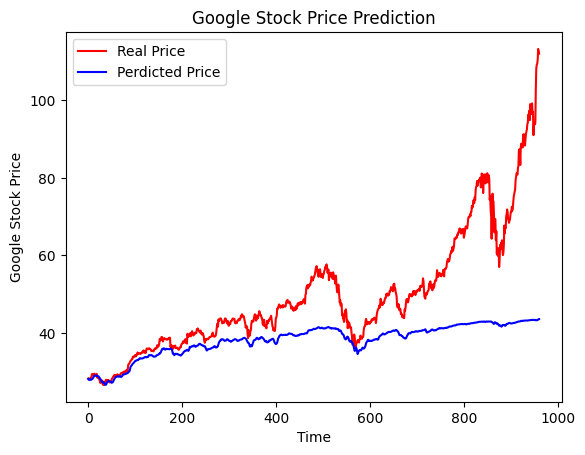

In [559]:
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_price,color = 'blue', label = 'Perdicted Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()